<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">Online Food Ordering</h1>
</div>

<div>
    <h3 style="font-weight: bold; font-family:Times New Roman">Description:</h3>
    <p  style="font-size: 16px;font-family:Times New Roman">his project is based on the analysis of a dataset of online food orders, with the aim of exploring the relationships between demographic factors, location and customer behavior.</p>
</div>
<nav>
    <h3 style="font-weight: bold; font-family:Times New Roman">Attributes:</h3>
    <ul style="font-size: 16px;font-family:Times New Roman">
        <li><strong>Age:</strong> Age of the customer.</li>
        <li><strong>Gender:</strong> Gender of the customer.</li>
        <li><strong>Marital Status:</strong> Marital status of the customer.</li>
        <li><strong>Occupation:</strong> Occupation of the customer.</li>
        <li><strong>Monthly Income:</strong> Monthly income of the customer.</li>
        <li><strong>Educational Qualifications:</strong> Educational qualifications of the customer.</li>
        <li><strong>Family Size:</strong> Number of individuals in the customer's family.</li>
        <li><strong>Latitude:</strong> Latitude of the customer's location.</li>
        <li><strong>Longitude:</strong> Longitude of the customer's location.</li>
        <li><strong>Output:</strong> Current status of the order (e.g., pending, confirmed, delivered).</li>
        <li><strong>Feedback:</strong> Feedback provided by the customer after receiving the order.</li>
    </ul>
</nav>
<div style="font-family:Times New Roman">
    <h3 style="font-weight: bold; font-family:Times New Roman">Purpose:</h3>
    <p  style="font-size: 16px;font-family:Times New Roman">Explore whether there are purchasing relationships for the food sold, understanding the influence of location, age, gender, family size and occupation of the customer on the purchase of the product</p>
</div>

<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">STEP 1 | Importing Data & Libraries</h1>
</div>

In [3]:
!pip install pandas
!pip install matplotlib
!pip install geopy
!pip install seaborn



[notice] A new release of pip is available: 24.0 -> 24.1

[notice] To update, run: python.exe -m pip install --upgrade pip




[notice] A new release of pip is available: 24.0 -> 24.1

[notice] To update, run: python.exe -m pip install --upgrade pip




[notice] A new release of pip is available: 24.0 -> 24.1

[notice] To update, run: python.exe -m pip install --upgrade pip




[notice] A new release of pip is available: 24.0 -> 24.1

[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import warnings  # Suppress warnings

# HTML & Styles
from colorama import Fore, Style
from IPython.display import display, HTML


<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">STEP 2 | Loading Data</h1>
</div>

In [5]:
df_Foods = pd.read_csv('/kaggle/input/online-food-dataset/onlinefoods.csv')

<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">Step 3 | Overview</h1>
</div>

In [34]:
df_Foods.drop(['Unnamed: 12'],inplace=True, axis=1)

In [53]:
def PrintColor(text: str, color=Fore.BLUE, style=Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string"
    print(style + color + text + Style.RESET_ALL)

def print_blue_large(text):
    PrintColor(text, Fore.BLUE + Style.BRIGHT)

def Heading(textLabels):
    length = len(textLabels) + 8
    print(f"\n{Style.BRIGHT}{Fore.RED}{'='*length}{Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.RED} || {textLabels}  {Style.RESET_ALL}")
    print(f"{Style.BRIGHT}{Fore.RED}{'='*length}{Style.RESET_ALL}")

# Function | Data Overview
def fDataOverview(data):

    # First 5 items of the DataFrame
    Heading("First 5 items of the DataFrame:")
    display(HTML(data.head(5).to_html(index=False).replace('<table border="1" class="data">', '<table style="border: 2px solid green;">')))

    # Remove column
    # df_Foods.drop(['Unnamed: 12'], index=1,inplace=True)
    Heading("COLUMN REMOVED: Unnamed: 12")

    # Information columns
    Heading("Information columns")
    PrintColor(f"Info Dataset | THERE ARE NO NULL VALUES", Fore.CYAN)
    df_Foods.info()

    # Describe
    Heading("Describe Columns")
    display(HTML(df_Foods.describe().to_html(index=False).replace('<table border="1" class="data">', '<table style="border: 2px solid green;">')))

    # Duplicates rows found
    Heading("Duplicates rows found:")
    print(df_Foods.duplicated().sum())

    # Number of rows and columns
    Heading("Number of rows and columns:")
    print(df_Foods.shape)

    Heading("Null values:")
    print(df_Foods.isnull().sum())



In [36]:
fDataOverview(df_Foods)




 || First 5 items of the DataFrame:  



Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,county
20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Bangalore North
24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Bangalore North
22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Bangalore East
22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Bangalore North
22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Bangalore North





 || COLUMN REMOVED: Unnamed: 12  





 || Information columns  


Info Dataset | THERE ARE NO NULL VALUES

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 388 entries, 0 to 387

Data columns (total 13 columns):

 #   Column                      Non-Null Count  Dtype  

---  ------                      --------------  -----  

 0   Age                         388 non-null    int64  

 1   Gender                      388 non-null    object 

 2   Marital Status              388 non-null    object 

 3   Occupation                  388 non-null    object 

 4   Monthly Income              388 non-null    object 

 5   Educational Qualifications  388 non-null    object 

 6   Family size                 388 non-null    int64  

 7   latitude                    388 non-null    float64

 8   longitude                   388 non-null    float64

 9   Pin code                    388 non-null    int64  

 10  Output                      388 non-null    object 

 11  Feedback              

Age,Family size,latitude,longitude,Pin code
388.000000,388.000000,388.000000,388.000000,388.000000
24.628866,3.280928,12.972058,77.600160,560040.113402
2.975593,1.351025,0.044489,0.051354,31.399609
18.000000,1.000000,12.865200,77.484200,560001.000000
23.000000,2.000000,12.936900,77.565275,560010.750000
24.000000,3.000000,12.977000,77.592100,560033.500000
26.000000,4.000000,12.997025,77.630900,560068.000000
33.000000,6.000000,13.102000,77.758200,560109.000000





 || Duplicates rows found:  


103




 || Number of rows and columns:  


(388, 13)




 || Null values:  


Age                           0

Gender                        0

Marital Status                0

Occupation                    0

Monthly Income                0

Educational Qualifications    0

Family size                   0

latitude                      0

longitude                     0

Pin code                      0

Output                        0

Feedback                      0

county                        0

dtype: int64


In [37]:
def unique_values(train_dataset):
    df_UniqueValues = pd.DataFrame({
        'Name': train_dataset.columns,
        'Type': [train_dataset[col].dtype for col in train_dataset.columns],
        'Unique Values': [', '.join(map(str, train_dataset[col].unique()[0:7])) for col in train_dataset.columns]
    })
    display(df_UniqueValues)

Heading("Unique Values in Dataset:")
unique_values(df_Foods)




 || Unique Values in Dataset:  



,Name,Type,Unique Values
0,Age,int64,"20, 24, 22, 27, 23, 21, 28"
1,Gender,object,"Female, Male"
2,Marital Status,object,"Single, Married, Prefer not to say"
3,Occupation,object,"Student, Employee, Self Employeed, House wife"
4,Monthly Income,object,"No Income, Below Rs.10000, More than 50000, 10..."
5,Educational Qualifications,object,"Post Graduate, Graduate, Ph.D, Uneducated, School"
6,Family size,int64,"4, 3, 6, 2, 5, 1"
7,latitude,float64,"12.9766, 12.977, 12.9551, 12.9473, 12.985, 12...."
8,longitude,float64,"77.5993, 77.5773, 77.6593, 77.5616, 77.5533, 7..."
9,Pin code,int64,"560001, 560009, 560017, 560019, 560010, 560103..."


In [41]:
PrintColor('REPORTS')
print_blue_large(f"\n1)The Unnamed: 12 column has been removed from the dataframe. \n2)There are no null values. \n3)Duplicate values: {df_Foods.duplicated().sum()}. \n4)Total number of rows and columns {df_Foods.shape}")

REPORTS



1)The Unnamed: 12 column has been removed from the dataframe. 

2)There are no null values. 

3)Duplicate values: 103. 

4)Total number of rows and columns (388, 13)


<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">Step 4 | Feature Engineering</h1>
</div>

In [11]:
# Function to get a adresss based on latitude and longitude
def get_county_name(latitude, longitude):
    # Inicialized geocoder
    geolocator = Nominatim(user_agent="Online Food Order")
    # Concatenates latitude and longitude into a string in the format "latitude, longitude"
    location = f"{latitude}, {longitude}"
    # Use the geocoder to obtain the address
    address = geolocator.reverse(location)
    # Checks if the address was found
    if address:
        # Extracts the city name from the 'address' subdictionary
        county = address.raw['address'].get('county', '')  # If 'city' does not exist, returns an empty string
        return county
    else:
        return None

# Apply the function to the DataFrame to obtain city names
df_Foods['county'] = df_Foods.apply(lambda row: get_county_name(row['latitude'], row['longitude']), axis=1)

In [12]:
Heading("County column created based on latitude and longitude: count")




 || County column created based on latitude and longitude: count  



In [42]:
PrintColor('REPORTS')
print_blue_large(f"\nCreate Column: {df_Foods['county'].name}")

REPORTS



Create Column: county


<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">Step 5 | EDA Analysis</h1>
</div>

<h3 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#808080; font-size:140%; font-family:Monospace; margin: auto">Summary</h3>

In [14]:
def frequencyNumber(ColumnName, Data):

    counts = Data[ColumnName].value_counts()

    # Sort age counts in descending order
    counts = counts.sort_values(ascending=False)

    # Normalize age counts for color gradient
    max_value = counts.max()
    normalized_counts = counts / max_value

    # Create color gradient from dark to light Brown
    cmap = plt.cm.get_cmap('Oranges')
    colors = cmap(normalized_counts)

    # Create a horizontal bar chart
    fig, ax = plt.subplots()
    bars = ax.barh(counts.index, counts.values, color=colors)

    for rect, value in zip(bars, counts.values):
        _x = rect.get_width()  # Get bar width
        _y = rect.get_y() + rect.get_height() / 2
        ax.text(_x + 1, _y, f" {value}", va='center', ha='left', fontsize=8)
        
    # Remove border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    average_age = Data[ColumnName].mean()
    ax.axhline(y=average_age, color='blue', linestyle='--', label=f'Average {ColumnName}')
    average_max = Data[ColumnName].max()
    ax.axhline(y=average_max, color='gray', linestyle='-', label=f'Max {ColumnName}')
    average_min = Data[ColumnName].min()
    ax.axhline(y=average_min, color='gray', linestyle='-', label=f'Min {ColumnName}')

    ax.text(78.0, average_age, f"Avg: {average_age:.2f}", va='center', ha='left', color='blue', fontsize=10)
    ax.text(78.0, average_max, f"Max: {average_max:.2f}", va='center', ha='left', color='gray', fontsize=10)
    ax.text(78.0, average_min, f"Min: {average_min:.2f}", va='center', ha='left', color='gray', fontsize=10)

    # Set labels and title
    plt.xlabel('Frequency of Orders')
    plt.ylabel(ColumnName)
    plt.title(f'Frequency of Orders by {ColumnName}')

    # Improve readability
    plt.yticks(rotation=0)

    plt.show()

C:\Users\pichau\AppData\Local\Temp\ipykernel_58484\2070974587.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

  cmap = plt.cm.get_cmap('Oranges')


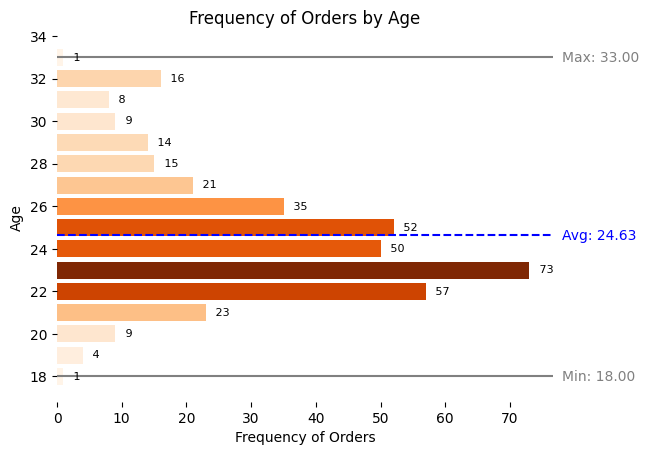

In [15]:
frequencyNumber('Age', df_Foods)

C:\Users\pichau\AppData\Local\Temp\ipykernel_58484\2070974587.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

  cmap = plt.cm.get_cmap('Oranges')


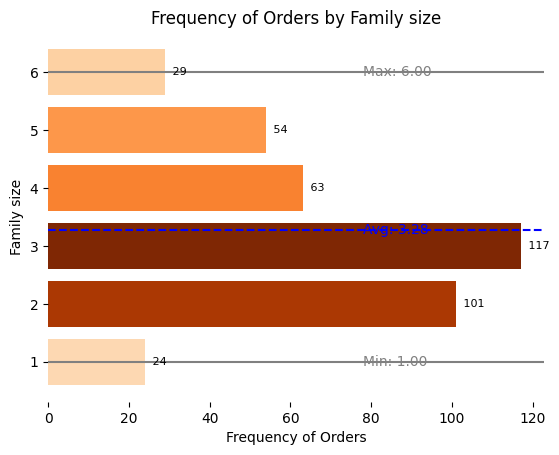

In [16]:
frequencyNumber('Family size', df_Foods)

In [17]:
def frequency(ColumnName, Dataset):

    counts = Dataset[ColumnName].value_counts()

    counts = counts.sort_values(ascending=True)

    max_value = counts.max()
    normalized_counts = counts / max_value

    cmap = plt.cm.get_cmap('Oranges')
    colors = cmap(normalized_counts)

    fig, ax = plt.subplots()
    bars = ax.barh(counts.index, counts.values, color=colors)

    for rect, value in zip(bars, counts.values):
        _x = rect.get_width()  # Get bar width
        _y = rect.get_y() + rect.get_height() / 2
        ax.text(_x + 1, _y, f" {value}", va='center', ha='left', fontsize=12)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.xlabel('Frequency of Orders')
    plt.ylabel(ColumnName)
    plt.title(f'Frequency of Orders by {ColumnName}')

    # Improve readability
    plt.yticks(rotation=0)

    plt.show()

C:\Users\pichau\AppData\Local\Temp\ipykernel_58484\593778391.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

  cmap = plt.cm.get_cmap('Oranges')


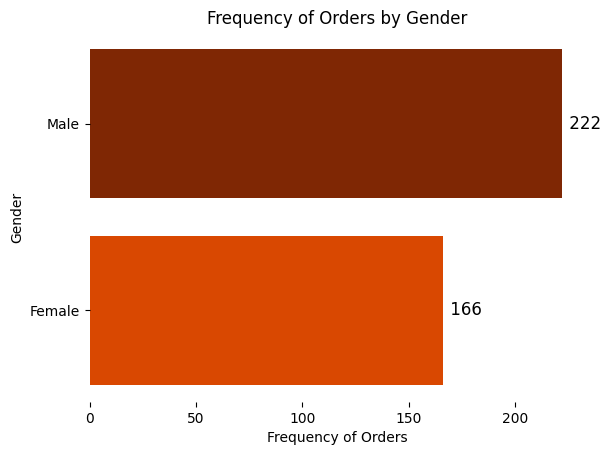

In [18]:
frequency('Gender', df_Foods)

C:\Users\pichau\AppData\Local\Temp\ipykernel_58484\593778391.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

  cmap = plt.cm.get_cmap('Oranges')


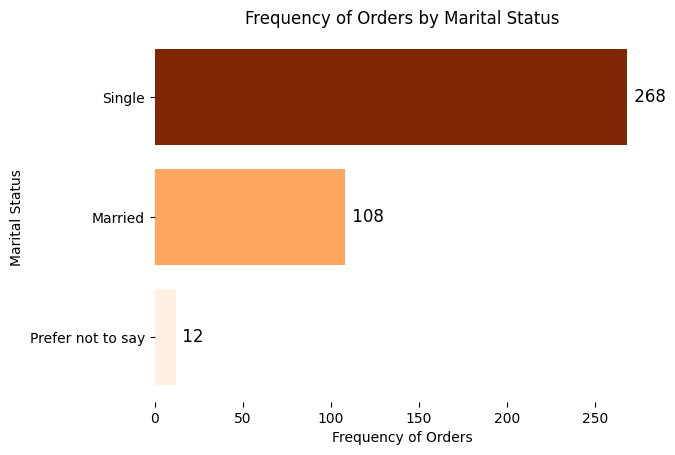

In [19]:
frequency('Marital Status', df_Foods)

C:\Users\pichau\AppData\Local\Temp\ipykernel_58484\593778391.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

  cmap = plt.cm.get_cmap('Oranges')


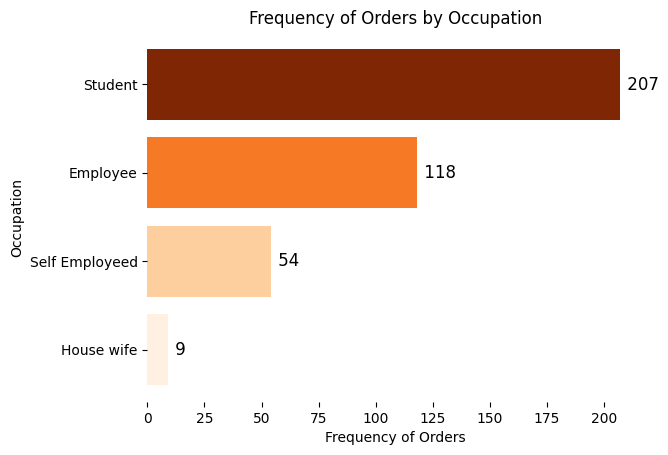

In [20]:
frequency('Occupation', df_Foods)

C:\Users\pichau\AppData\Local\Temp\ipykernel_58484\593778391.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

  cmap = plt.cm.get_cmap('Oranges')


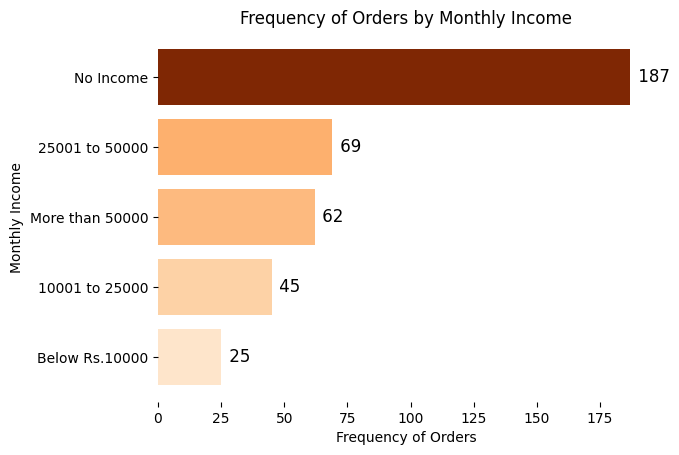

In [21]:
frequency('Monthly Income', df_Foods)

C:\Users\pichau\AppData\Local\Temp\ipykernel_58484\593778391.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

  cmap = plt.cm.get_cmap('Oranges')


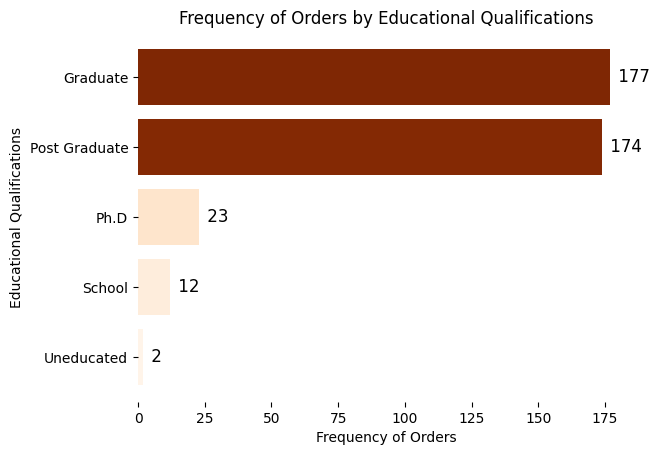

In [22]:
frequency('Educational Qualifications', df_Foods)

C:\Users\pichau\AppData\Local\Temp\ipykernel_58484\593778391.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

  cmap = plt.cm.get_cmap('Oranges')


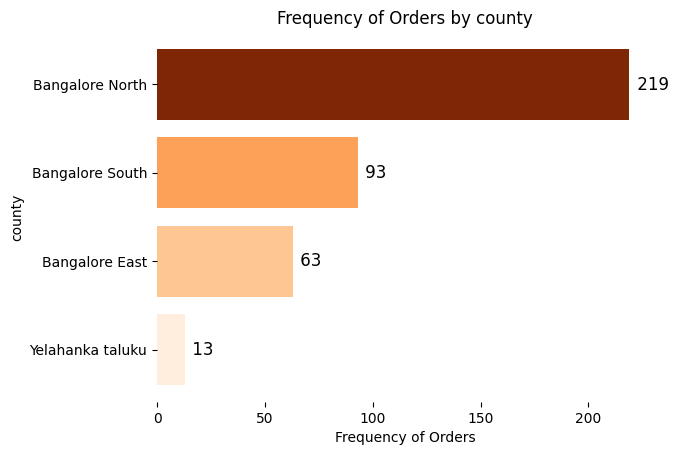

In [23]:
frequency('county', df_Foods)

C:\Users\pichau\AppData\Local\Temp\ipykernel_58484\593778391.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

  cmap = plt.cm.get_cmap('Oranges')


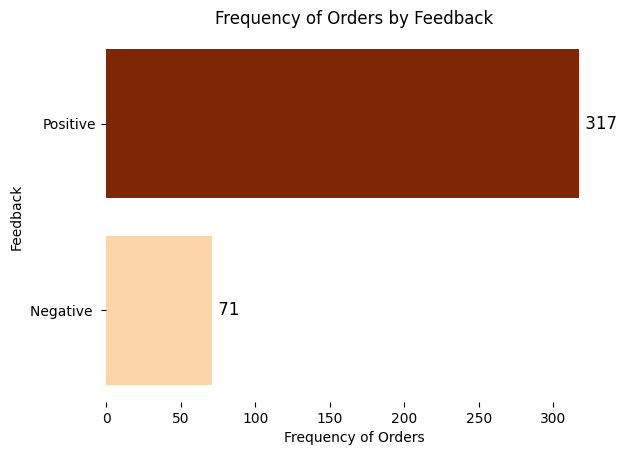

In [24]:
frequency('Feedback', df_Foods)

In [54]:
PrintColor('REPORTS')

print_blue_large(f"\nFREQUENCY OF ORDERS BY AGE \nThe age group with the highest number of requests is {df_Foods['Age'].value_counts().idxmax() } years old, with an average of {df_Foods['Age'].mean()} years old.\nMinimun age:{df_Foods['Age'].min()} \nMaximum age:{df_Foods['Age'].max()}")
print_blue_large(f"\nFREQUENCY OF ORDERS BY FAMILY SIZE \nThe Family size group with the highest number of requests is {df_Foods['Family size'].value_counts().idxmax() } people, with an average of ~ {df_Foods['Family size'].mean()}.\nMinimun:{df_Foods['Family size'].min()} \nMaximum:{df_Foods['Family size'].max()}")
print_blue_large(f"\nFREQUENCY OF ORDERS BY Gender \nThe Gender group with the highest number of requests is:\n{df_Foods[df_Foods['Gender'] == 'Male']['Gender'].value_counts()} \n{df_Foods[df_Foods['Gender'] == 'Female']['Gender'].value_counts()}")

REPORTS



FREQUENCY OF ORDERS BY AGE 

The age group with the highest number of requests is 23 years old, with an average of 24.628865979381445 years old.

Minimun age:18 

Maximum age:33



FREQUENCY OF ORDERS BY FAMILY SIZE 

The Family size group with the highest number of requests is 3 people, with an average of ~ 3.2809278350515463.

Minimun:1 

Maximum:6



FREQUENCY OF ORDERS BY Gender 

The Gender group with the highest number of requests is:

Gender

Male    222

Name: count, dtype: int64 

Gender

Female    166

Name: count, dtype: int64


In [28]:
# IN PROGRESS

<h3 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#808080; font-size:140%; font-family:Monospace; margin: auto">Filter by Gender</h3>

<div style="width:100%; height:50px; background-color: #FA8072; border-radius:5px 5px; display:flex; ">
    <h1 style="width:100%; font-weight: bold; font-family:Times New Roman; color:#FFF5EE; font-size:140%; font-family:Monospace; text-align:center; margin: auto">Step 6 | Outlier Dedection</h1>
</div>

# Step 7 | Numerical Feature Distribution

# Step 7.1 | Normalization

# Step 8 | Correlation Analysis

# Step 9 | Encoding

# Step 10 | Model Building

# Base Classifier

# Fitting Classifier

# Evaluating Classifier

# Storing Reults in DF and Visualizing the Results